<a href="https://colab.research.google.com/github/ehs208/machinelearning/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. int64형 칼럼
- PassengerId: 탑승자 데이터 일련번호
- Survived: 생존 여부 (0=사망, 1=생존)
- Pclass: 티켓의 선실 등급 (1=일등석, 2=이등석, 3=삼등석)
- SibSp: 같이 탑승한 형제자매 또는 배우자 인원수
- Parch: 같이 탑승한 부모님 또는 어린이 인원수
2. float64형 칼럼
- Age: 탑승자 나이
- Fare: 요금
3. object(문자열)형 칼럼
- Name: 탑승자 이름
- Sex: 탑승자 성별
- Ticket: 티켓 번호
- Cabin: 선실 번호
- Embarked: 중간 정착 항구 (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
train.isnull().sum()[train.isnull().sum()>0] #훈련 셋에서의 NULL 값 확인

Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
test.isnull().sum()[test.isnull().sum()>0] #테스트 셋에서의 NULL 값 확인

Age       86
Fare       1
Cabin    327
dtype: int64

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Cabin'] = train['Cabin'].fillna('N')
train['Embarked'] = train['Embarked'].fillna('N')

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Cabin'] = test['Cabin'].fillna('N')
test['Embarked'] = test['Embarked'].fillna('N')
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

#Age 값과 Fare 값은 평균값으로 대체, 나머지는 'N' 값으로 대체

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
train['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

Cabin 속성의 경우, 좌석의 등급이기 때문에 맨 앞자리만 사용

In [ ]:
train['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
#성별_train 원핫인코딩

sex_train_dummies = pd.get_dummies(train["Sex"])
sex_train_dummies.columns = ["Female", "Male"]
train.drop("Sex", axis = 1, inplace = True)
train = train.join(sex_train_dummies)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,N,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,N,S,0,1


In [ ]:
#성별_test 원핫인코딩

sex_test_dummies = pd.get_dummies(test["Sex"])
sex_test_dummies.columns = ["Female", "Male"]
test.drop("Sex", axis = 1, inplace = True)
test = test.join(sex_test_dummies)
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,N,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,N,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,N,Q,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,N,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,N,S,1,0


In [ ]:
# Embarked 원핫인코딩

embarked_train_dummies = pd.get_dummies(train["Embarked"])
embarked_train_dummies.columns = ["S", "C", "Q", "N"]
train.drop("Embarked", axis = 1, inplace = True)
train = train.join(embarked_train_dummies)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,S,C,Q,N
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,N,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,N,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,N,0,1,0,0,0,1


In [ ]:
# Embarked 테스트 원핫인코딩

embarked_test_dummies = pd.get_dummies(test["Embarked"])
embarked_test_dummies.columns = ["S", "C", "Q"]
test.drop("Embarked", axis = 1, inplace = True)
test = test.join(embarked_test_dummies)
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,S,C,Q
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,N,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,N,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,N,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,N,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,N,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

for feature in ['Cabin']:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

for feature in ['Cabin']:
    le = LabelEncoder()
    le = le.fit(test[feature])
    test[feature] = le.transform(test[feature])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,S,C,Q,N
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,7,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,7,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,7,0,1,0,0,0,1


In [ ]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,S,C,Q
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,7,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,7,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,7,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,7,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,7,1,0,0,0,1


In [ ]:
titanic_data = train[['Pclass', 'Female', 'Male', 'Age','S', 'C', 'Q', 'Cabin']].to_numpy()
titanic_target = train['Survived'].to_numpy()

In [ ]:
test_data = test[['Pclass', 'Female', 'Male', 'Age','S', 'C', 'Q', 'Cabin']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    titanic_data, titanic_target, test_size=0.2, random_state=201935302, stratify = titanic_target)

print(train_input.shape, test_input.shape)

(712, 8) (179, 8)


## 데이터 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=201935302)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9283707865168539
0.776536312849162


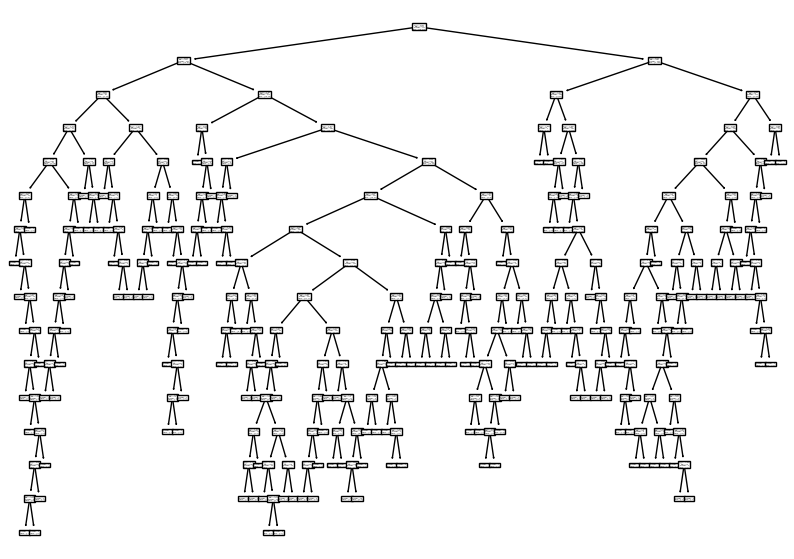

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

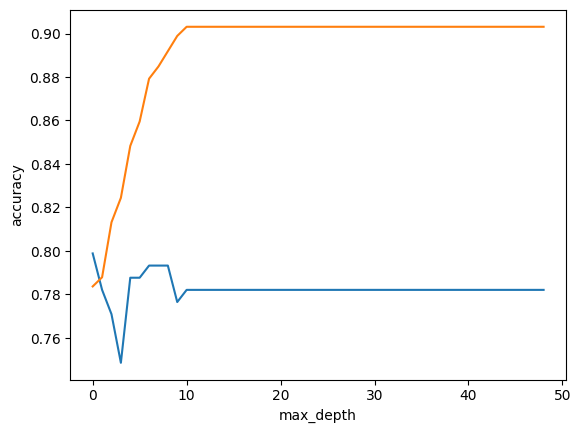

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_score = []
test_score = []
for i in range(1, 50):
  model = DecisionTreeClassifier(max_depth = i, random_state=201935302, min_impurity_decrease=0.0005)
  model.fit(train_input, train_target)
  train_score.append(model.score(train_input, train_target))
  test_score.append(model.score(test_input, test_target))
import matplotlib.pyplot as plt
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=201935302) #최대 가지 개수를 2으로 조절하여 최적화
model.fit(train_input, train_target)

print(model.score(train_input, train_target))
print(model.score(test_input, test_target))

0.7879213483146067
0.7821229050279329


In [ ]:
print(model.predict(test_data))

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


## SGD분류

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=201935302)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7724719101123596
0.7374301675977654


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


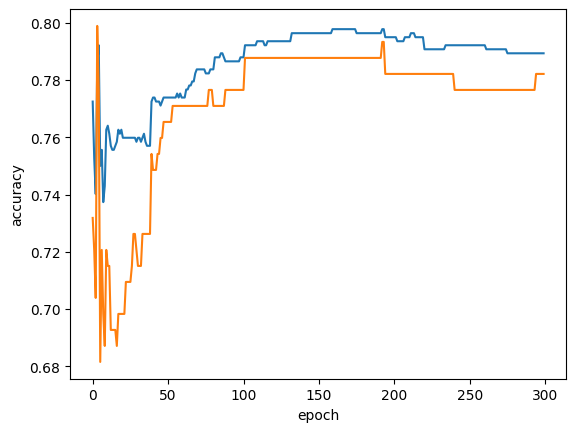

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=180, tol=None, random_state=201935222)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7865168539325843
0.8044692737430168


## 랜덤 포레스트

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=201935302)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9322344525637469 0.8048064611444893


## 히스토그램기반 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.891859525791632 0.8146754653796908
